In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/family-guy-dialogues-with-various-lexicon-ratings/Ratings_FG5.csv
/kaggle/input/family-guy-dialogues-with-various-lexicon-ratings/Family_Guy_Final_NRC_AFINN_BING.csv
/kaggle/input/family-guy-dialogues-with-various-lexicon-ratings/GPT_lex11.csv


In [4]:
import nltk

In [6]:
# load data
filename = '/kaggle/input/family-guy-dialogues-with-various-lexicon-ratings/Family_Guy_Final_NRC_AFINN_BING.csv'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)

In [15]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt') 

family = "Mom, Dad, I found cigarettes in Greg's jacket."
tokens = word_tokenize(family)
print(tokens)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Mom', ',', 'Dad', ',', 'I', 'found', 'cigarettes', 'in', 'Greg', "'s", 'jacket', '.']


Train the TfidfVectorizer bag-of-words encoder and use it to encode multiple small text documents

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["My goodness. This chair leg was loose. Isn't that silly?",
 "The goodness",
 "The chair",
       "Excellent! The mind-control device is nearing completion!",
 "mind-control",
 "The device"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'my': 11, 'goodness': 5, 'this': 16, 'chair': 0, 'leg': 8, 'was': 17, 'loose': 9, 'isn': 7, 'that': 14, 'silly': 13, 'the': 15, 'excellent': 4, 'mind': 10, 'control': 2, 'device': 3, 'is': 6, 'nearing': 12, 'completion': 1}
[1.84729786 2.25276297 1.84729786 1.84729786 2.25276297 1.84729786
 2.25276297 2.25276297 2.25276297 2.25276297 1.84729786 2.25276297
 2.25276297 2.25276297 2.25276297 1.33647224 2.25276297 2.25276297]
(1, 18)
[[0.26824728 0.         0.         0.         0.         0.26824728
  0.         0.32712513 0.32712513 0.32712513 0.         0.32712513
  0.         0.32712513 0.32712513 0.         0.32712513 0.32712513]]


Train and encode some small text documents using the Keras API and the ‘count’ type scoring of words.

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text documents
docs = [
    "Mom, Dad, I found cigarettes in Greg's jacket.",
    "Greg, were you smoking cigarettes?",
    "No, Dad.",
    "He's lying. There's no doubt about that.",
    "Greg, I'm afraid your punishment will be four hours in the snakepit.",
    "That'll give you time to think about what you did.",
    "Jan, I'm afraid you've earned a day in the fire chamber for tattling on your brother.",
    "Smoking. How does a boy like that go so wrong?"
    "You've impeded my work since the day I escaped from your wretched womb."
]

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# Fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)

# Examine what the tokenizer has learned
word_index = tokenizer.word_index
print(f"Word Index: {word_index}")

Word Index: {'<OOV>': 1, 'in': 2, 'you': 3, 'your': 4, 'the': 5, 'dad': 6, 'i': 7, 'cigarettes': 8, 'greg': 9, 'smoking': 10, 'no': 11, 'about': 12, 'that': 13, "i'm": 14, 'afraid': 15, "you've": 16, 'a': 17, 'day': 18, 'mom': 19, 'found': 20, "greg's": 21, 'jacket': 22, 'were': 23, "he's": 24, 'lying': 25, "there's": 26, 'doubt': 27, 'punishment': 28, 'will': 29, 'be': 30, 'four': 31, 'hours': 32, 'snakepit': 33, "that'll": 34, 'give': 35, 'time': 36, 'to': 37, 'think': 38, 'what': 39, 'did': 40, 'jan': 41, 'earned': 42, 'fire': 43, 'chamber': 44, 'for': 45, 'tattling': 46, 'on': 47, 'brother': 48, 'how': 49, 'does': 50, 'boy': 51, 'like': 52, 'go': 53, 'so': 54, 'wrong': 55, 'impeded': 56, 'my': 57, 'work': 58, 'since': 59, 'escaped': 60, 'from': 61, 'wretched': 62, 'womb': 63}


Define a few contrived sentences and train a word embedding representation in Gensim.

In [25]:
!pip install -U gensim

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Train a word embedding model and then plot a two-dimensional projection of all words in the vocabulary.

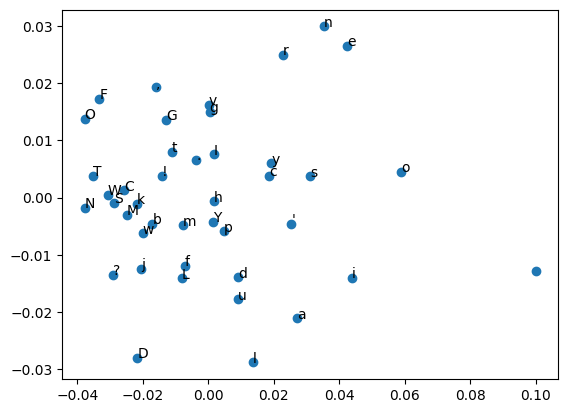

In [31]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


# Define training data
sentences = [
    "Mom, Dad, I found cigarettes in Greg's jacket.",
    "Greg, were you smoking cigarettes?",
    "No, Mom.",
    "I can't believe you. Liar.",
    "Well, I'm not buying you the car now.",
    "What! Oh, man!",
    "Greg, your mother and I are disappointed that you're trying to sell a car you don't own.",
    "That's it, young man. You're grounded!",
    "Forget it! I'm not staying in this house of lies!",
    "Chris, I don't like your tone.",
    "Sorry, Dad.",
    "You've impeded my work since the day I escaped from your wretched womb."
]

# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Fit a 2D PCA model to the vectors
X = model.wv.vectors  # Correct way to access vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  # Correct way to get vocabulary words
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


The relationship between different elements (likely words) is visualized in a two-dimensional space. The closer two points are in this space, the more similar they are according to the underlying model or data.

Data Visualization

In [49]:
import pandas as pd

In [50]:
family = pd.read_csv('/kaggle/input/family-guy-dialogues-with-various-lexicon-ratings/Family_Guy_Final_NRC_AFINN_BING.csv')

In [51]:
family.head(10)

,Season,Episode,Time_Stamp,Dialogue,NRC_Sentiment,AFINN_Sentiment,AFINN_Sentiment_Score,BING_Sentiment
0,1,1,00:00:07,"Mom, Dad, I found cigarettes in Greg's jacket.","joy,positive,trust",Neutral,0,Neutral
1,1,1,00:00:10,"Greg, were you smoking cigarettes?",Neutral,Neutral,0,Neutral
2,1,1,00:00:10,"No, Dad.",Neutral,Negative,-2,Neutral
3,1,1,00:00:12,He's lying. There's no doubt about that.,"anger,disgust,fear,negative,sadness,trust",Negative,-2,Negative
4,1,1,00:00:14,"Greg, I'm afraid your punishment will be four ...","anger,disgust,fear,negative",Negative,-2,Negative
5,1,1,00:00:18,That'll give you time to think about what you ...,anticipation,Neutral,0,Neutral
6,1,1,00:00:20,Man!,Neutral,Neutral,0,Neutral
7,1,1,00:00:22,That'll teach him.,"joy,positive,surprise,trust",Neutral,0,Neutral
8,1,1,00:00:26,"Jan, I'm afraid you've earned a day in the fir...","fear,negative,positive,trust",Negative,-4,Negative
9,1,1,00:00:29,Smoking. How does a boy like that go so wrong?,negative,Neutral,0,Positive


In [62]:
family.columns

Index(['Season', 'Episode', 'Time_Stamp', 'Dialogue', 'NRC_Sentiment',
       'AFINN_Sentiment', 'AFINN_Sentiment_Score', 'BING_Sentiment'],
      dtype='object')

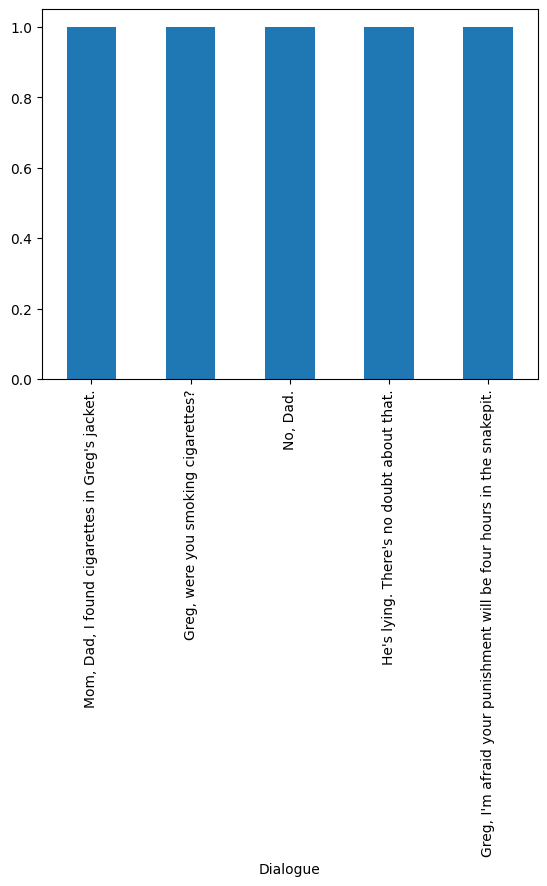

In [65]:
# Bar chart 
family['Dialogue'].head().value_counts().plot(kind='bar')
plt.show()

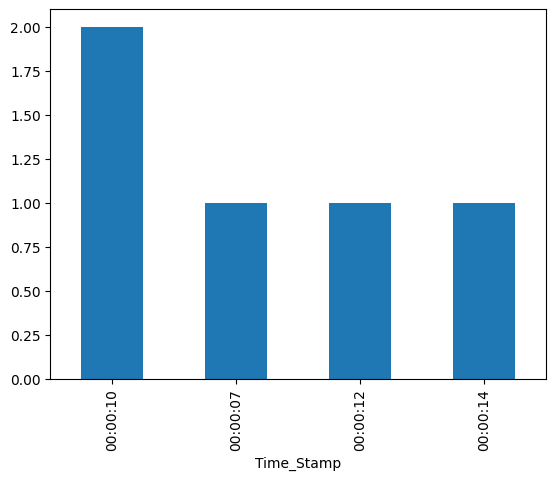

In [66]:
# Bar chart 
family['Time_Stamp'].head().value_counts().plot(kind='bar')
plt.show()

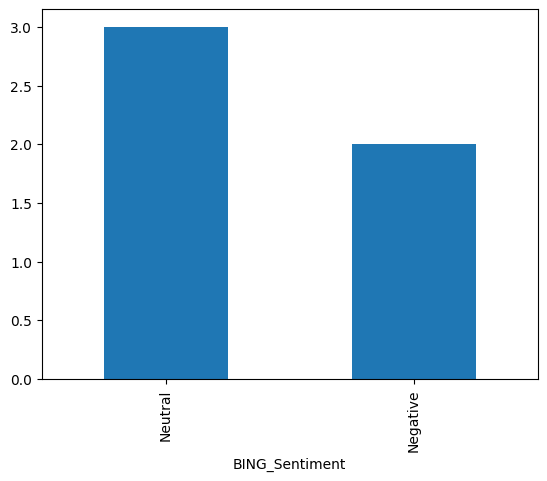

In [67]:
# Bar chart 
family['BING_Sentiment'].head().value_counts().plot(kind='bar')
plt.show()

In [45]:
ratings = pd.read_csv('/kaggle/input/family-guy-dialogues-with-various-lexicon-ratings/Ratings_FG5.csv')

In [46]:
ratings.head(10)

,Season,Episode,Rating_Imdb,Rating
0,1,1,7.7,6.8
1,1,2,7.5,6.5
2,1,3,7.6,6.5
3,1,4,7.4,2.5
4,1,5,7.4,7.5
5,1,6,7.2,6.5
6,1,7,7.5,5.7
7,2,1,7.6,7.5
8,2,2,7.3,4.5
9,2,3,8.1,5.6


In [48]:
ratings.describe()

,Season,Episode,Rating_Imdb,Rating
count,351.000000,351.000000,351.000000,351.000000
mean,9.914530,10.464387,7.167521,5.975499
std,5.160132,6.178142,0.583609,1.671842
min,1.000000,1.000000,4.200000,2.000000
25%,5.000000,5.000000,6.800000,4.700000
50%,10.000000,10.000000,7.200000,6.500000
75%,14.000000,15.000000,7.500000,7.500000
max,19.000000,27.000000,9.100000,9.500000


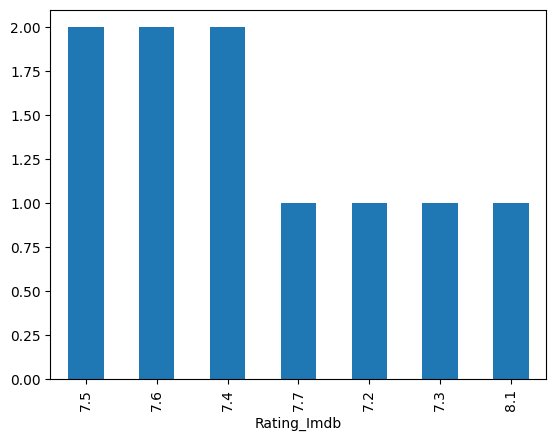

In [60]:
# Bar chart 
ratings['Rating_Imdb'].head(10).value_counts().plot(kind='bar')
plt.show()

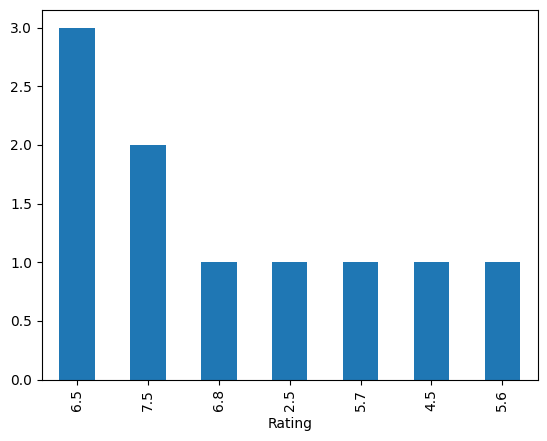

In [61]:
# Bar chart 
ratings['Rating'].head(10).value_counts().plot(kind='bar')
plt.show()